Assignment Tasks

1. Clean the survey data and conduct a full EDA. (25 pts)
Aggregate all Countries to their Continents.
Drop US States
Look for and handle missing values
Create indicator variables for categoricals, bin where you feel appropriate
Clean bad data (e.g. the value movies is present in “Are you a dog or a cat person?”
Visualize the distributions of cleaned variables

2. Use Pearson's Correlation Coefficient, determine which variables are most highly collinear, and graph the results. (hint: http://stanford.edu/~mwaskom/ software/seaborn/examples/ many_pairwise_correlations. html) (25pts)

3. Create a random forest model that predicts YOUR dependent variable based on the remaining variables.  If your dependent variable is muti-class (more than just two classes) then I'd like you to use a confusion matrix to measure model performance.  If you'd like, you may also experiment with one-vs-all AUC methods.  (50 pts)

The Confusion Matrix was really confusing.  I attempt and read about it but couldn't get anywhere.  I was able to get some output with just the standard score method using the RandomForestClassifier import.  Not very good prediction.

My dependent variable: Income


In [67]:
%matplotlib inline

In [438]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd

# Import the data
TempDF = pd.read_csv("C:\\Users\\TVita\\Documents\\GitHub\\CS570\\CS570\\RedditShortDemoSurvey-1-Cleaned.csv")
#y = X.pop("Income")

In [439]:
TempDF.head()

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN


In [440]:
#what are the columns in the data called
TempDF.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18',
       u'Unnamed: 19'],
      dtype='object')

In [441]:
#Create a new dataset with simplified headers and ignore the US states
X = pd.DataFrame()
X['id'] = TempDF['Entry Id']
X['gender'] = TempDF['Please indicate your gender.']
X['age_range'] = TempDF['Please select the category that includes your age.']
X['married'] = TempDF['What is your marital status?']
X['employment'] = TempDF['What best describes your employment status?']
X['veteran'] = TempDF['Are you or have you ever been in military service?']
X['minors'] = TempDF['Do you currently have children under the age of 18 living in your household?']
X['education'] = TempDF['What best describes your level of education?']
X['country'] = TempDF['Treated country data']
X['income_range'] = TempDF['Which one of the following ranges includes your total yearly household income before taxes?']
X['subreddit'] = TempDF['treated subreddit data']
X['catdog'] = TempDF['Are you a dog or a cat person?']
X['cheese'] = TempDF['If you were a cheese, what cheese would you be?']
X['14'] = TempDF['Unnamed: 14']
X['15'] = TempDF['Unnamed: 15']
X['16'] = TempDF['Unnamed: 16']
X['17'] = TempDF['Unnamed: 17']
X['18'] = TempDF['Unnamed: 18']
X['19'] = TempDF['Unnamed: 19']

In [442]:
X.head()

,id,gender,age_range,married,employment,veteran,minors,education,country,income_range,subreddit,catdog,cheese,14,15,16,17,18,19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN


Based on some of the data that can be seen quickly from X.head() I am going to pull out a few resolve any missing values and dummy them. I can see Veteran, Minors, and Married might be good to check.

In [443]:
X['gender'] = pd.get_dummies(X.gender)['Female']

In [444]:
X.minors.value_counts()

No      27488
Yes      5047
None      219
Name: minors, dtype: int64

In [445]:
#Set Minors none values to No and then dummy the values
X.minors[X.minors == "None"] = "No"
X['minors'] = pd.get_dummies(X.minors)['Yes']

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [446]:
X.veteran.value_counts()

No      30526
Yes      2223
none        5
Name: veteran, dtype: int64

In [447]:
#Set veterans none values to No and then dummy the values
X.veteran[X.veteran == "None"] = "No"
X['veteran'] = pd.get_dummies(X.veteran)['Yes']

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [448]:
#Leave these alone
X.married.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: married, dtype: int64

In [449]:
X.catdog.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
none                   5
askreddit              2
 Reddit.com            1
movies                 1
Name: catdog, dtype: int64

In [450]:
X.head()

,id,gender,age_range,married,employment,veteran,minors,education,country,income_range,subreddit,catdog,cheese,14,15,16,17,18,19
0,1,0,25-34,Blank,Employed full time,0,0,Bachelor's degree,United States,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,25-34,Blank,Employed full time,0,0,Bachelor's degree,United States,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,18-24,Blank,Freelance,0,0,Some college,United States,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,25-34,Blank,Freelance,0,0,Bachelor's degree,United States,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,25-34,Blank,Employed full time,0,0,Bachelor's degree,United States,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN


In [451]:
X.catdog[X.catdog == "I like dogs."] = "d"
X.catdog[X.catdog == "I like cats."] = "c"
X.catdog[X.catdog == "I like turtles."] = "t"
X.catdog[(X.catdog != "d") & (X.catdog != "c") & (X.catdog != "t")] = "n"

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is 

In [452]:
X.catdog.value_counts()

d    17149
c    11152
t     4442
n       11
Name: catdog, dtype: int64

In [453]:
#numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X.head()

,id,gender,age_range,married,employment,veteran,minors,education,country,income_range,subreddit,catdog,cheese,14,15,16,17,18,19
0,1,0,25-34,Blank,Employed full time,0,0,Bachelor's degree,United States,"$150,000 or more",getmotivated,n,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,25-34,Blank,Employed full time,0,0,Bachelor's degree,United States,"$150,000 or more",gaming,n,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,18-24,Blank,Freelance,0,0,Some college,United States,"Under $20,000",snackexchange,n,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,25-34,Blank,Freelance,0,0,Bachelor's degree,United States,"$150,000 or more",spacedicks,n,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,25-34,Blank,Employed full time,0,0,Bachelor's degree,United States,"$70,000 - $99,999",aww,n,none,NaN,NaN,NaN,NaN,NaN,NaN


Look at the Countries and see what needs mapped.

In [454]:
X.country.value_counts()

United States                       20967
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

In [455]:
#Continent lookup: N->North America, A->Asia, B->Africa, D->Austrailia/New Zealand/Pacific Islands, E->Europe, S->South America
cont_lookup = {('Usa', 'Unnited States', "United States", 'United States of America', 'USVI', 'United States (Guam)', 'Canada', 'canada', 'Mexico', "Trinidad*", "Puerto Rico") : 'N', 
        ('United Kingdom', 'Norway', 'Belgium', 'Belgrium', 'Germany', 'Sweden', 'Ireland', 'Finland', 'Denmark', 'France', 'Netherlands', 'The Netherlands', 
         'Poland', "*Spain", 'Romania', 'Portugal', 'Switzerland', 'Italy', 'Czech', 'England', "*Macedonia") : 'E', 
        ('India', "*China", 'Hong Kong','Malaysia', 'Philippines', 'Kosova', 'Korea', "Thailand", "Taiwan", 'Singapore', 'Japan') : 'A', 
        ('South Africa') : 'B',
        ('Brazil', 'Argentina') : 'S', 
        ('Australia', 'New Zealand', 'NewZealand') : 'D'}

cont_lookup_={}
for keys,v in cont_lookup.items():
    for k in keys:
        cont_lookup_[k]=v
X['continent'] = X['country'].map(cont_lookup_)


In [456]:
X.continent.value_counts()

N    24142
E     4418
D     1366
A      486
S      167
Name: continent, dtype: int64

In [457]:
#Because Reddit decided to let users type a country instead of choose we are going to drop the column and set any missing values
#to a typo continent value: T->Typo
X.drop('country', axis=1, inplace=True)

In [458]:
X['continent'].fillna("T", inplace=True)

In [459]:
X.continent

0        N
1        N
2        N
3        N
4        N
5        N
6        E
7        N
8        N
9        E
10       N
11       N
12       N
13       E
14       N
15       N
16       N
17       E
18       T
19       N
20       E
21       E
22       E
23       N
24       E
25       N
26       N
27       N
28       N
29       N
        ..
32724    N
32725    N
32726    N
32727    E
32728    N
32729    N
32730    N
32731    T
32732    N
32733    N
32734    N
32735    N
32736    N
32737    N
32738    T
32739    N
32740    N
32741    N
32742    D
32743    N
32744    N
32745    N
32746    N
32747    N
32748    T
32749    E
32750    T
32751    E
32752    N
32753    N
Name: continent, dtype: object

In [460]:
X.head()

,id,gender,age_range,married,employment,veteran,minors,education,income_range,subreddit,catdog,cheese,14,15,16,17,18,19,continent
0,1,0,25-34,Blank,Employed full time,0,0,Bachelor's degree,"$150,000 or more",getmotivated,n,none,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2,0,25-34,Blank,Employed full time,0,0,Bachelor's degree,"$150,000 or more",gaming,n,none,NaN,NaN,NaN,NaN,NaN,NaN,N
2,3,1,18-24,Blank,Freelance,0,0,Some college,"Under $20,000",snackexchange,n,none,NaN,NaN,NaN,NaN,NaN,NaN,N
3,4,0,25-34,Blank,Freelance,0,0,Bachelor's degree,"$150,000 or more",spacedicks,n,none,NaN,NaN,NaN,NaN,NaN,NaN,N
4,5,1,25-34,Blank,Employed full time,0,0,Bachelor's degree,"$70,000 - $99,999",aww,n,none,NaN,NaN,NaN,NaN,NaN,NaN,N


In [461]:
X.age_range.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: age_range, dtype: int64

In [462]:
#Lets get rid of entries that have multiple None fields like age employment and income
X = X[(X.age_range != "None") & (X.employment != "None") & (X.income_range != "none")]

In [463]:
X.employment.value_counts()

Employed full time                       14494
Student                                  11970
Not employed, but looking for work        1956
Freelance                                 1862
Not employed and not looking for work      636
Retired                                     82
Name: employment, dtype: int64

In [464]:
X.income_range.value_counts()

Under $20,000          7856
$50,000 - $69,999      4111
$70,000 - $99,999      4083
$100,000 - $149,999    3501
$20,000 - $29,999      3195
$30,000 - $39,999      2896
$150,000 or more       2685
$40,000 - $49,999      2673
Name: income_range, dtype: int64

In [465]:
X.dtypes

id                int64
gender          float64
age_range        object
married          object
employment       object
veteran         float64
minors          float64
education        object
income_range     object
subreddit        object
catdog           object
cheese           object
14               object
15               object
16               object
17               object
18               object
19               object
continent        object
dtype: object

In [466]:
#From Jasons code
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
    
describe_categorical(X)

,age_range,married,employment,education,income_range,subreddit,catdog,cheese,14,15,16,17,18,19,continent
count,31000,31000,31000,31000,31000,27236,31000,31000,2,2,1,1,1,1,31000
unique,7,7,6,8,8,1770,4,16,2,2,1,1,1,1,6
top,18-24,Single,Employed full time,Bachelor's degree,"Under $20,000",askreddit,d,Other,7/14/11 12:12,public,I like cats.,Other,7/14/11 13:22,public,N
freq,14920,9784,14494,10600,7856,2018,16178,6207,1,1,1,1,1,1,23087


In [467]:
#From the function above we see that columns 14-19 are really junk and can get deleted

X.drop(["14", "15", "16", "17", "18", "19"], axis=1, inplace=True)

In [468]:
#From the table above it also looks like subreddit is just a random list of forums and not really all that valuable 
#I will drop it
X.drop('subreddit', axis=1, inplace=True)

In [469]:
#Remove the bad data and set them to Other
X.cheese.value_counts()

Other            6207
Cheddar          5788
Brie             3585
Provolone        3325
Swiss            3057
Feta             2859
Goat             2403
Munster          1511
American         1351
Paneer            589
Limburger         315
none                5
 f7u12              2
 Pics               1
 awww               1
programming')       1
Name: cheese, dtype: int64

In [470]:
X.cheese[(X.cheese == "none")] = "Other"

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [471]:
# Change the Cabin variable to be only the first letter or None
def clean(x):
    try:
        return x[0]
    except TypeError:
        return "None"

X["cheese"] = X.cheese.apply(clean)

In [472]:
X.head()

,id,gender,age_range,married,employment,veteran,minors,education,income_range,catdog,cheese,continent
0,1,0,25-34,Blank,Employed full time,0,0,Bachelor's degree,"$150,000 or more",n,O,N
1,2,0,25-34,Blank,Employed full time,0,0,Bachelor's degree,"$150,000 or more",n,O,N
2,3,1,18-24,Blank,Freelance,0,0,Some college,"Under $20,000",n,O,N
3,4,0,25-34,Blank,Freelance,0,0,Bachelor's degree,"$150,000 or more",n,O,N
4,5,1,25-34,Blank,Employed full time,0,0,Bachelor's degree,"$70,000 - $99,999",n,O,N


In [473]:
X.employment[X.employment == "Not employed, but looking for work"] = "Looking"

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [474]:
X.employment.value_counts()

Employed full time                       14494
Student                                  11970
Looking                                   1956
Freelance                                 1862
Not employed and not looking for work      636
Retired                                     82
Name: employment, dtype: int64

In [475]:
#Some highschool is essentially none
X.education[X.education == "Some high school"] = "None"

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [476]:
X.education.value_counts()

Bachelor's degree                     10600
Some college                           9097
Graduate or professional degree        4541
High school graduate or equivalent     3018
None                                   1739
Associate degree                       1381
Trade or Vocational degree              624
Name: education, dtype: int64

In [477]:
# Change the Cabin variable to be only the first letter or None

X["married"] = X.married.apply(clean)
X["employment"] = X.employment.apply(clean)
X["education"] = X.education.apply(clean)

In [478]:
X.head()

,id,gender,age_range,married,employment,veteran,minors,education,income_range,catdog,cheese,continent
0,1,0,25-34,B,E,0,0,B,"$150,000 or more",n,O,N
1,2,0,25-34,B,E,0,0,B,"$150,000 or more",n,O,N
2,3,1,18-24,B,F,0,0,S,"Under $20,000",n,O,N
3,4,0,25-34,B,F,0,0,B,"$150,000 or more",n,O,N
4,5,1,25-34,B,E,0,0,B,"$70,000 - $99,999",n,O,N


In [479]:
X.age_range.value_counts()

18-24          14920
25-34          11261
35-44           2167
Under 18        1989
45-54            471
55-64            133
65 or Above       59
Name: age_range, dtype: int64

In [480]:
X.age_range[X.age_range == "Under 18"] = "1"
X.age_range[X.age_range == "18-24"] = "2"
X.age_range[X.age_range == "25-34"] = "3"
X.age_range[X.age_range == "35-44"] = "4"
X.age_range[X.age_range == "45-54"] = "5"
X.age_range[X.age_range == "55-64"] = "6"
X.age_range[X.age_range == "65 or Above"] = "7"

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is 

In [481]:
X.head()

,id,gender,age_range,married,employment,veteran,minors,education,income_range,catdog,cheese,continent
0,1,0,3,B,E,0,0,B,"$150,000 or more",n,O,N
1,2,0,3,B,E,0,0,B,"$150,000 or more",n,O,N
2,3,1,2,B,F,0,0,S,"Under $20,000",n,O,N
3,4,0,3,B,F,0,0,B,"$150,000 or more",n,O,N
4,5,1,3,B,E,0,0,B,"$70,000 - $99,999",n,O,N


In [482]:
X.income_range.value_counts()

Under $20,000          7856
$50,000 - $69,999      4111
$70,000 - $99,999      4083
$100,000 - $149,999    3501
$20,000 - $29,999      3195
$30,000 - $39,999      2896
$150,000 or more       2685
$40,000 - $49,999      2673
Name: income_range, dtype: int64

In [483]:
#X.income_range[X.income_range == "Under $20,000"] = "1"
#X.income_range[X.income_range == "$20,000 - $29,999"] = "2"
#X.income_range[X.income_range == "$30,000 - $39,999"] = "3"
#X.income_range[X.income_range == "$40,000 - $49,999"] = "4"
#X.income_range[X.income_range == "$50,000 - $69,999"] = "5"
#X.income_range[X.income_range == "$70,000 - $99,999"] = "6"
#X.income_range[X.income_range == "$100,000 - $149,999"] = "7"
#X.income_range[X.income_range == "$150,000 or more"] = "8"

In [484]:
categorical_variables = ['age_range', 'married', 'employment', 'education', 'catdog', 'cheese', 'continent']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [485]:
X

,id,gender,veteran,minors,income_range,age_range_1,age_range_2,age_range_3,age_range_4,age_range_5,...,cheese_O,cheese_P,cheese_S,cheese_p,continent_A,continent_D,continent_E,continent_N,continent_S,continent_T
0,1,0,0,0,"$150,000 or more",0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,2,0,0,0,"$150,000 or more",0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,1,0,0,"Under $20,000",0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,4,0,0,0,"$150,000 or more",0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,5,1,0,0,"$70,000 - $99,999",0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
5,6,0,0,0,"$150,000 or more",0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,8,0,0,0,"$70,000 - $99,999",0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,9,0,0,0,"$150,000 or more",0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
9,10,0,0,0,"$70,000 - $99,999",0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
10,11,0,0,0,"Under $20,000",0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [486]:
# Look at all the columns in the dataset
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)

,id,gender,veteran,minors,income_range,age_range_1,age_range_2,age_range_3,age_range_4,age_range_5,age_range_6,age_range_7,married_B,married_E,married_F,married_I,married_M,married_S,married_W,employment_E,employment_F,employment_L,employment_N,employment_R,employment_S,education_A,education_B,education_G,education_H,education_N,education_S,education_T,catdog_c,catdog_d,catdog_n,catdog_t,cheese_,cheese_A,cheese_B,cheese_C,cheese_F,cheese_G,cheese_L,cheese_M,cheese_O,cheese_P,cheese_S,cheese_p,continent_A,continent_D,continent_E,continent_N,continent_S,continent_T
0,1,0,0,0,"$150,000 or more",0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,2,0,0,0,"$150,000 or more",0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,1,0,0,"Under $20,000",0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,0,0,0,"$150,000 or more",0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,5,1,0,0,"$70,000 - $99,999",0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32748,32751,0,1,0,"$150,000 or more",0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
32749,32752,1,0,0,"Under $20,000",0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
32751,32754,0,0,0,"$20,000 - $29,999",0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
32752,32755,0,0,1,"$100,000 - $149,999",0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [487]:
y = X.pop("income_range")

In [508]:
X.drop('id', axis=1, inplace=True)

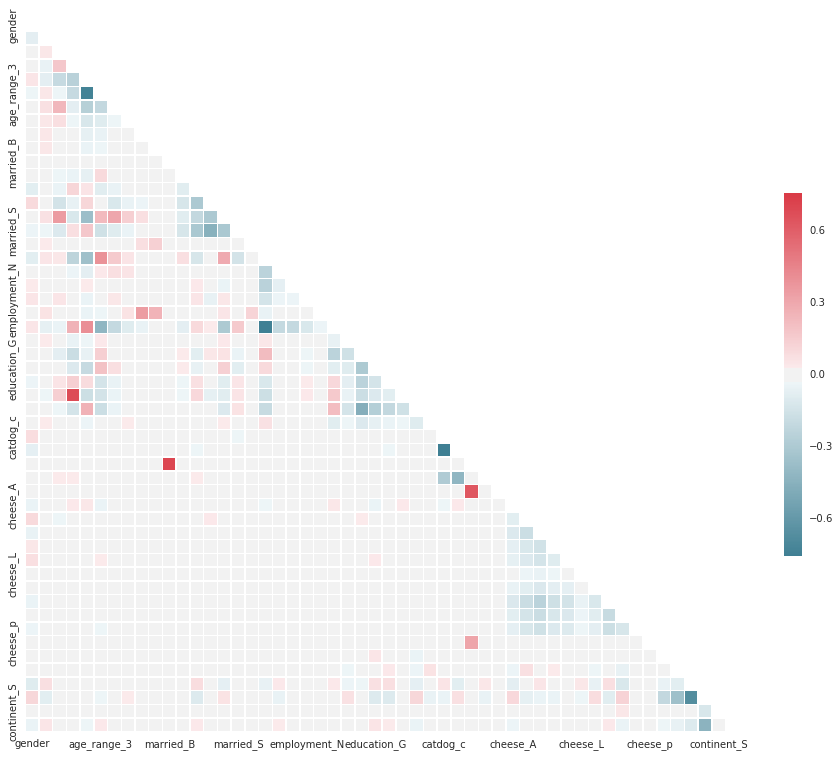

In [511]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [488]:
X.dtypes

id                int64
gender          float64
veteran         float64
minors          float64
age_range_1     float64
age_range_2     float64
age_range_3     float64
age_range_4     float64
age_range_5     float64
age_range_6     float64
age_range_7     float64
married_B       float64
married_E       float64
married_F       float64
married_I       float64
married_M       float64
married_S       float64
married_W       float64
employment_E    float64
employment_F    float64
employment_L    float64
employment_N    float64
employment_R    float64
employment_S    float64
education_A     float64
education_B     float64
education_G     float64
education_H     float64
education_N     float64
education_S     float64
education_T     float64
catdog_c        float64
catdog_d        float64
catdog_n        float64
catdog_t        float64
cheese_         float64
cheese_A        float64
cheese_B        float64
cheese_C        float64
cheese_F        float64
cheese_G        float64
cheese_L        

In [536]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(100, oob_score=True, n_jobs=-1, random_state=42,min_samples_leaf=0.2)

model.fit(X, y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=0.2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [537]:
model.score(X, y)

0.63119354838709674

In [520]:
model.predict(X)

array(['$150,000 or more', '$150,000 or more', 'Under $20,000', ...,
       '$40,000 - $49,999', '$100,000 - $149,999', '$20,000 - $29,999'], dtype=object)

In [513]:
model.oob_score_

0.28664516129032258

In [23]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.864772739377


### Variable importance measures

In [514]:
model.feature_importances_

array([  5.74827691e-02,   4.14829944e-02,   3.97066017e-02,
         5.43795192e-03,   2.23131660e-02,   1.54494763e-02,
         9.87191516e-03,   4.65567891e-03,   1.94673373e-03,
         1.08983122e-03,   1.38689502e-04,   1.11925062e-02,
         2.27226642e-02,   2.71564424e-02,   2.23626578e-02,
         2.76545402e-02,   9.39917303e-04,   4.21633442e-02,
         1.01834909e-02,   1.07782014e-02,   6.81700648e-03,
         1.02960413e-03,   2.50876829e-02,   1.35874890e-02,
         2.40846747e-02,   1.94813884e-02,   1.78332368e-02,
         1.01848932e-02,   2.22500935e-02,   9.54742218e-03,
         4.08407879e-02,   4.12816466e-02,   1.90109510e-04,
         3.15914162e-02,   1.06295807e-04,   1.62201274e-02,
         3.30234471e-02,   3.93807277e-02,   3.04208337e-02,
         2.79644795e-02,   8.01292200e-03,   1.96572043e-02,
         4.06630780e-02,   3.01562122e-02,   3.08161097e-02,
         1.48277003e-05,   7.31908128e-03,   1.31535352e-02,
         2.00483790e-02,

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  app.launch_new_instance()


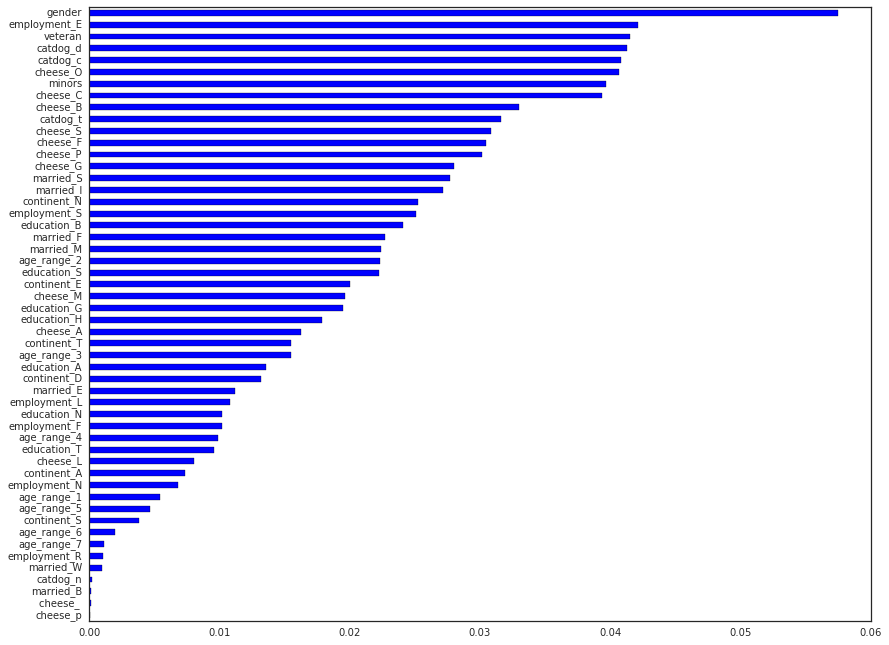

In [517]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(14,11));

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:41: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


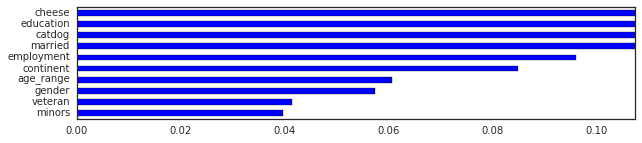

In [518]:
# Complex version that shows the summary view

def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)